In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import seaborn as sns
from scipy import stats

In [8]:
data = pd.read_csv("numerical_data.csv")
data = data.drop(['Unnamed: 0'],axis=1)

In [10]:
data

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0,2763.519279,56274,69,32,5,0,1,384.811147
1,1,6979.535903,0,94,13,42,0,8,1131.464935
2,2,12887.431650,48767,108,18,38,0,2,566.472247
3,3,7645.861827,0,106,18,65,0,7,529.881344
4,4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...,...
9129,9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,9131,8163.890428,0,85,9,37,3,2,790.784983
9132,9132,7524.442436,21941,96,34,3,0,3,691.200000


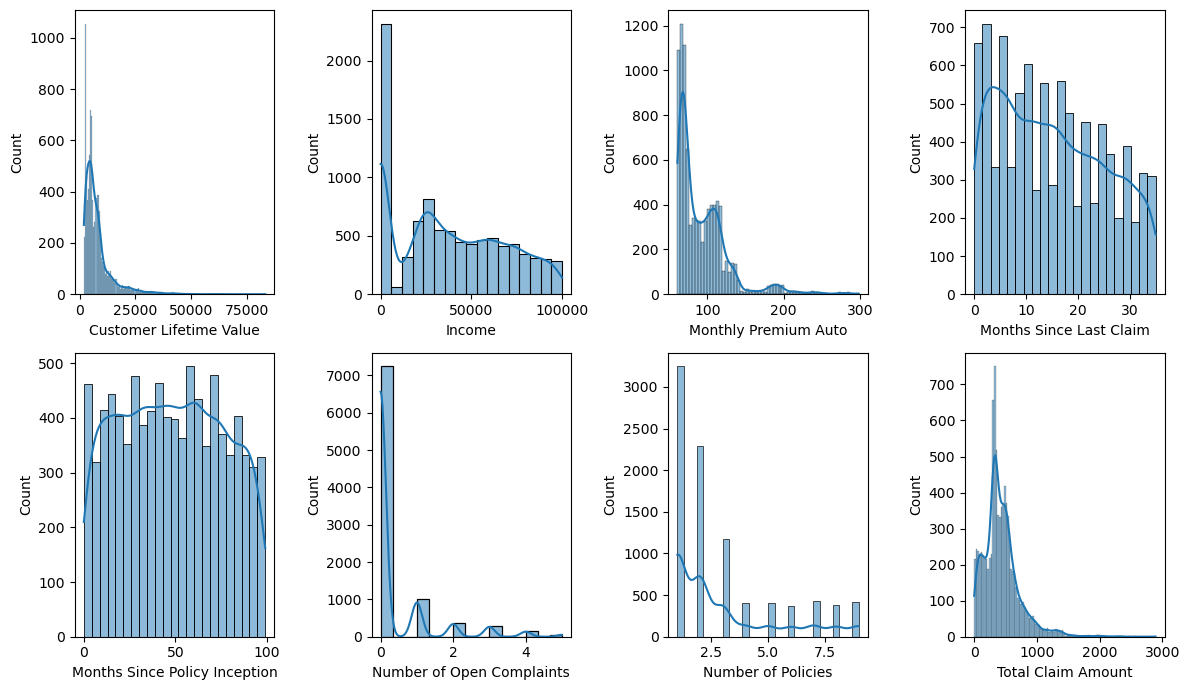

In [11]:
fig, axis = plt.subplots(2,4, figsize=(12,7))

sns.histplot(data['Customer Lifetime Value'].values, kde=True, ax = axis[0,0]).set_xlabel('Customer Lifetime Value')

sns.histplot(data['Income'].values, kde=True, ax = axis[0,1]).set_xlabel('Income')

sns.histplot(data['Monthly Premium Auto'].values, kde=True, ax = axis[0,2]).set_xlabel('Monthly Premium Auto')

sns.histplot(data['Months Since Last Claim'].values, kde=True, ax = axis[0,3]).set_xlabel('Months Since Last Claim')

sns.histplot(data['Months Since Policy Inception'].values, kde=True, ax = axis[1,0]).set_xlabel('Months Since Policy Inception')

sns.histplot(data['Number of Open Complaints'].values, kde=True, ax = axis[1,1]).set_xlabel('Number of Open Complaints')

sns.histplot(data['Number of Policies'].values, kde=True, ax = axis[1,2]).set_xlabel('Number of Policies')

sns.histplot(data['Total Claim Amount'].values, kde=True, ax = axis[1,3]).set_xlabel('Total Claim Amount')

plt.tight_layout()

In [12]:
np.log(data['Customer Lifetime Value'])

0        7.924260
1        8.850738
2        9.464008
3        8.941920
4        7.942253
          ...    
9129    10.060747
9130     8.038031
9131     9.007476
9132     8.925912
9133     7.867809
Name: Customer Lifetime Value, Length: 9134, dtype: float64

In [13]:
data['Customer Lifetime Value log'] = np.log(data['Customer Lifetime Value'])

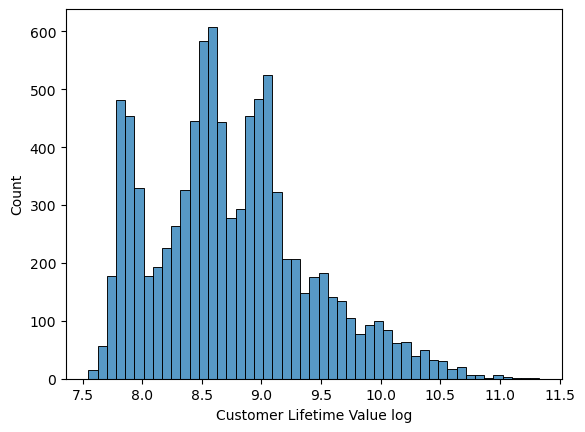

In [14]:
sns.histplot(data['Customer Lifetime Value log'])
plt.show()

In [18]:
stats.boxcox(data['Customer Lifetime Value'])

(array([2.70383943, 2.75492635, 2.78077243, ..., 2.76206241, 2.75839723,
        2.70016535]),
 -0.3460077279198611)

In [19]:
arr, lmbda = stats.boxcox(data['Customer Lifetime Value'])

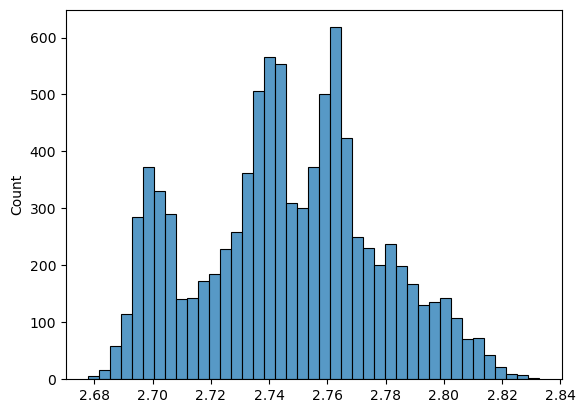

In [20]:
sns.histplot(arr)
plt.show()

In [31]:
np.log(data['Income'])

C:\Users\Utilizador\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0       10.937988
1            -inf
2       10.794809
3            -inf
4       10.688211
          ...    
9129    11.183602
9130     9.980634
9131         -inf
9132     9.996112
9133         -inf
Name: Income, Length: 9134, dtype: float64

In [43]:
len(data[data['Income'] < 0])

0

In [44]:
np.where(data['Income'] < 0, 0, data['Income'])

array([56274,     0, 48767, ...,     0, 21941,     0], dtype=int64)

In [45]:
data['Income_temp'] = np.where(data['Income'] < 0, 0, data['Income'])

In [46]:
data

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Customer Lifetime Value log,Income_temp
0,0,2763.519279,56274,69,32,5,0,1,384.811147,7.924260,56274
1,1,6979.535903,0,94,13,42,0,8,1131.464935,8.850738,0
2,2,12887.431650,48767,108,18,38,0,2,566.472247,9.464008,48767
3,3,7645.861827,0,106,18,65,0,7,529.881344,8.941920,0
4,4,2813.692575,43836,73,12,44,0,1,138.130879,7.942253,43836
...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,23405.987980,71941,73,18,89,0,2,198.234764,10.060747,71941
9130,9130,3096.511217,21604,79,14,28,0,1,379.200000,8.038031,21604
9131,9131,8163.890428,0,85,9,37,3,2,790.784983,9.007476,0
9132,9132,7524.442436,21941,96,34,3,0,3,691.200000,8.925912,21941


In [51]:
data['Income_temp'].replace(0, data['Income_temp'].mean(), inplace=True)

In [52]:
stats.boxcox(data['Income_temp'])

(array([42.11498267, 38.34627666, 40.73536758, ..., 38.34627666,
        33.75131941, 38.34627666]),
 0.20848018430247728)

In [53]:
arr, lmbda = stats.boxcox(data['Income_temp'])

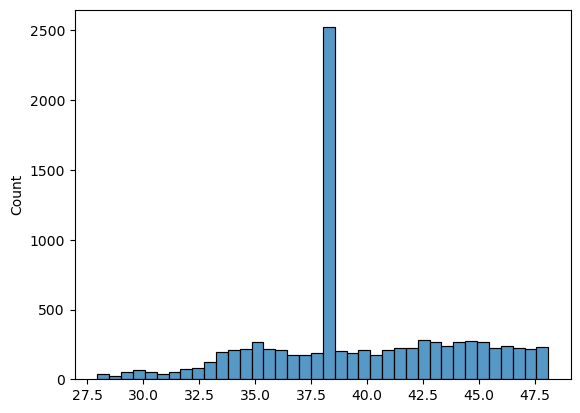

In [54]:
sns.histplot(arr)
plt.show()

In [38]:
stats.boxcox(data['Monthly Premium Auto'])

(array([0.68534739, 0.6858706 , 0.68603902, ..., 0.68572538, 0.68589838,
        0.68556047]),
 -1.4560475713521648)

In [39]:
arr, lmbda = stats.boxcox(data['Monthly Premium Auto'])

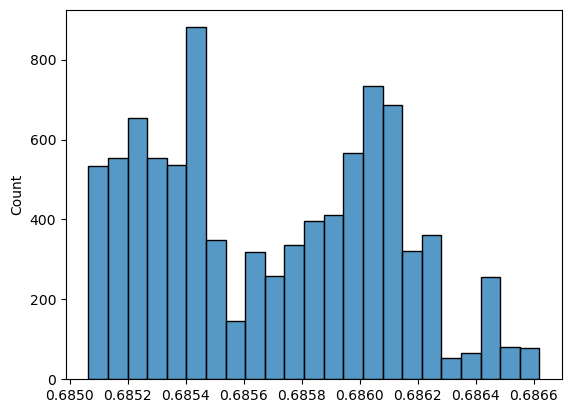

In [40]:
sns.histplot(arr)
plt.show()

In [74]:
len(data[data['Total Claim Amount'] <= 0])

0

In [75]:
stats.boxcox(data['Total Claim Amount'])

(array([33.03575151, 56.3576136 , 40.07178941, ..., 47.26372572,
        44.22514655, 32.37310739]),
 0.4718167582845637)

In [76]:
arr, lmbda = stats.boxcox(data['Total Claim Amount'])

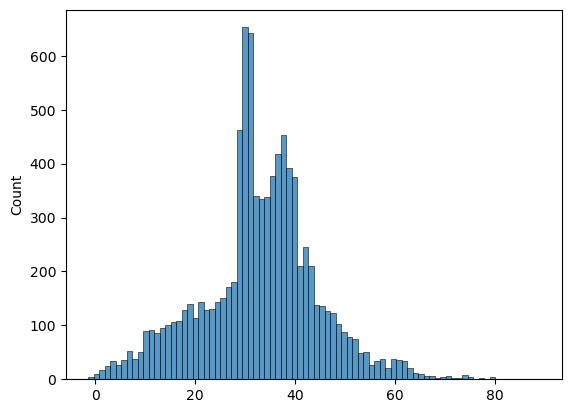

In [77]:
sns.histplot(arr)
plt.show()

In [78]:
X = data.drop(['Total Claim Amount'],axis=1)
Y = data['Total Claim Amount']

In [79]:
Y.to_csv('Y_data.csv')